<a href="https://colab.research.google.com/github/HarshCasper/Brihaspati/blob/master/Iris/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Importing Libraries ** 

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

**Importing Dataset**

In [0]:
df = pd.read_csv("drive/My Drive/Projects/Iris/Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
print('Rows :',df.shape[0])
print('Columns :',df.shape[1])

Rows : 150
Columns : 6


In [0]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [0]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [0]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

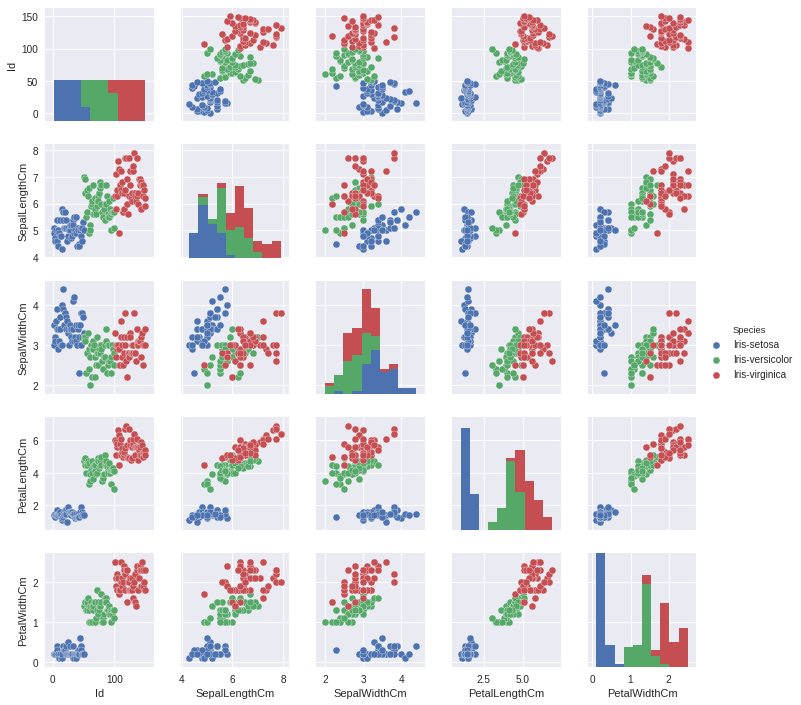

In [0]:

sns.pairplot(df,hue='Species',size=2)

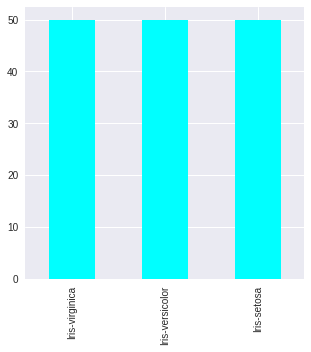

In [0]:
df['Species'].value_counts().plot.bar(color = 'cyan', figsize = (5, 5))

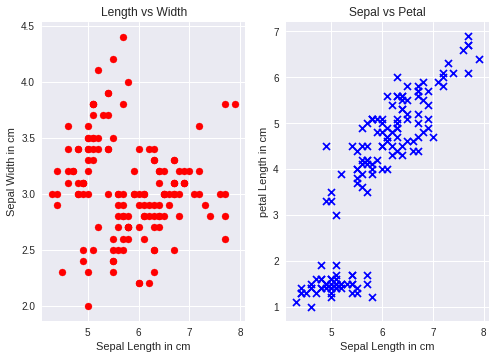

In [0]:
plt.subplot(1, 2, 1)
plt.scatter(x = df['SepalLengthCm'], y = df['SepalWidthCm'], color = 'red', marker = 'o',)
plt.title('Length vs Width')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')

plt.subplot(1, 2, 2)
plt.scatter(x = df['SepalLengthCm'], y = df['PetalLengthCm'], color = 'blue', marker = 'x',)
plt.title('Sepal vs Petal')
plt.xlabel('Sepal Length in cm')
plt.ylabel('petal Length in cm')
plt.show()


In [0]:
features = list(df.columns)

print(features)

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [0]:
features.remove('Id')
features.remove('Species')

print(features)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [0]:

Y = df.Species
X = df[features].values.astype(np.float32)

print(X.shape)
print(Y.shape)


(150, 4)
(150,)


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [0]:
# standardization

#from sklearn.preprocessing import MinMaxScaler

#mm = MinMaxScaler()

# feeding the data to the scaler
#x_train = mm.fit_transform(x_train)
#x_test = mm.transform(x_test)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# feeding the into the scaler

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



**Using Machine Learning to solve the Iris Dataset**

**Support Vector Classifier**

In [0]:
model = SVC()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)



training accuracy : 0.9583333333333334
testing accuracy : 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


**Decision Tree**

In [0]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test ,y_test))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

training accuracy : 1.0
testing accuracy : 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


**Random Forest**

In [0]:
model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

training accuracy : 1.0
testing accuracy : 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Logistic Regression**

In [0]:
model = LogisticRegression(C = 1000, random_state = 0)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test,y_pred)
print(cm)

training accuracy : 0.975
testing accuracy : 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


**Using Neural Networks to solve Iris Dataset**

**Importing the libraries**

In [0]:
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import seaborn as sns

**Multi Layer Perceptron**

In [0]:
model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

training accuracy : 0.975
testing accuracy : 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Misclassified Samples : %d" %(y_test != y_pred).sum())

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix :",cm)


Misclassified Samples : 1
Training Accuracy : 0.9583333333333334
Testing Accuracy : 0.9666666666666667
Confusion Matrix : [[11  0  0]
 [ 0 13  1]
 [ 0  0  5]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
